# Life Expectancy vs. GDP
**Objective:** Utilize data visualization techniques in Python to draw conclusions concerning the relationship of GDP and life expectancy in six countries.  

## 1. Loading Necessary Libraries

In [126]:
import pandas as pd  # For data organization and manipulation
from matplotlib import pyplot as plt  # For basic visualization features
import seaborn as sns  # For more robust visualizations
import numpy as np  # For statistical analyses

## 2. Importing and Inspecting Data

In [127]:
df = pd.read_csv('all_data.csv')  # Import the dataset from a CSV file and save it to a DataFrame named 'df'
df.info()  # Review the column names, types, and null counts
df.head()  # Show a sample of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


From our initial inspection of the data, we see the columns already appear in the appropriate formats and no values are missing.  Consequently, no grooming is required and we may move immediately into creating our visualizations.

## 3. Visualizations

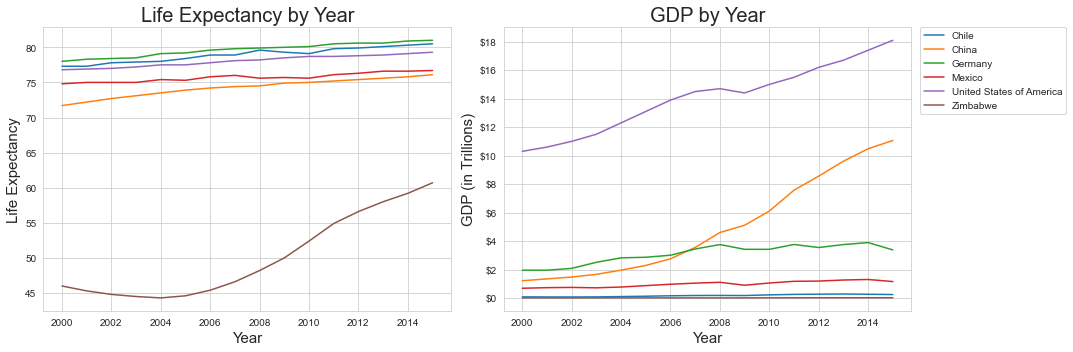

<Figure size 432x288 with 0 Axes>

In [128]:
# Creating side-by-side plots for life expectancy and GDP by year

fig, axes = plt.subplots(1, 2, figsize = (15, 5))  # Creating two subplots and increasing the plot's overall size
ax1 = sns.lineplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)', 
                   hue = 'Country', ax = axes[0], legend = False)  # Adding the life expectancy plot on the left
ax1.set_xlabel('Year', size = 15)  # Formatting the label of the left plot's x-axis
ax1.set_ylabel('Life Expectancy', size = 15)  # Formatting the label of the left plot's y-axis
ax1.set_title('Life Expectancy by Year', size = 20)  # Adding a title to the left plot
ax2 = sns.lineplot(data = df, x = 'Year', y = 'GDP', 
                   hue = 'Country', ax = axes[1])  # Adding the GDP plot on the right
ax2.set_yticks(range(0, 20000000000000, int(20000000000000 / 10)))  # Designating 10 ticks for the GDP on the y-axis
ax2.set_yticklabels(['$' + str(i) for i in range(0,20,2)])  # Making the labeling of those ticks more legible
ax2.set_xlabel('Year', size = 15)  # Formatting the label of the right plot's x-axis
ax2.set_ylabel('GDP (in Trillions)', size = 15)  # Formatting the label of the right plot's y-axis
ax2.set_title('GDP by Year', size = 20)  # Adding a title to the right plot
sns.set_style('whitegrid')  # Picking a style to include a grid for easier reference
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  # Moving the legend off of the plots
plt.tight_layout()  # Picking a layout to prevent overlapping of plot labels
plt.show()  # Displaying the plots
plt.clf()  # Clearing the plot formatting to prevent interference in later plots

For our next visualization, we will want to inspect how one variable (GDP) might affect the other (Life Expectancy) for each country .  This relationship may best be observed with a scatterplot.

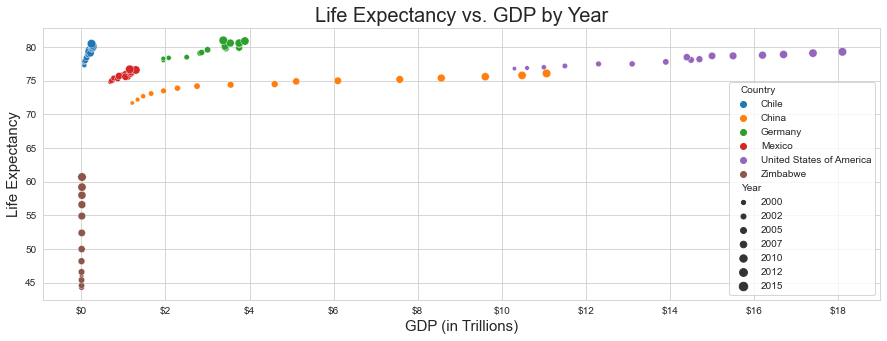

<Figure size 432x288 with 0 Axes>

In [129]:
fig, axes = plt.subplots(figsize = (15, 5))  # Increase the size of the plot
ax = sns.scatterplot(data = df, x = 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country', size = 'Year')
ax.set_xticks(range(0, 20000000000000, int(20000000000000 / 10)))  # Designating 10 ticks for the GDP on the x-axis
ax.set_xticklabels(['$' + str(i) for i in range(0,20,2)])  # Making the labeling of those ticks more legible
ax.set_xlabel('GDP (in Trillions)', size = 15)  # Formatting the label of the right plot's y-axis
ax.set_ylabel('Life Expectancy', size = 15)  # Formatting the label of the left plot's y-axis
ax.set_title('Life Expectancy vs. GDP by Year', size = 20)  # Add a title to the plot
plt.show()  # Displaying the plot
plt.clf()  # Clearing the plot formatting to prevent interference in later plots

It appears, not surprisingly, that increases in GDP are positively correlated to a country's life expectency.  We can see this more clearly by plotting each country individually with a regression line.

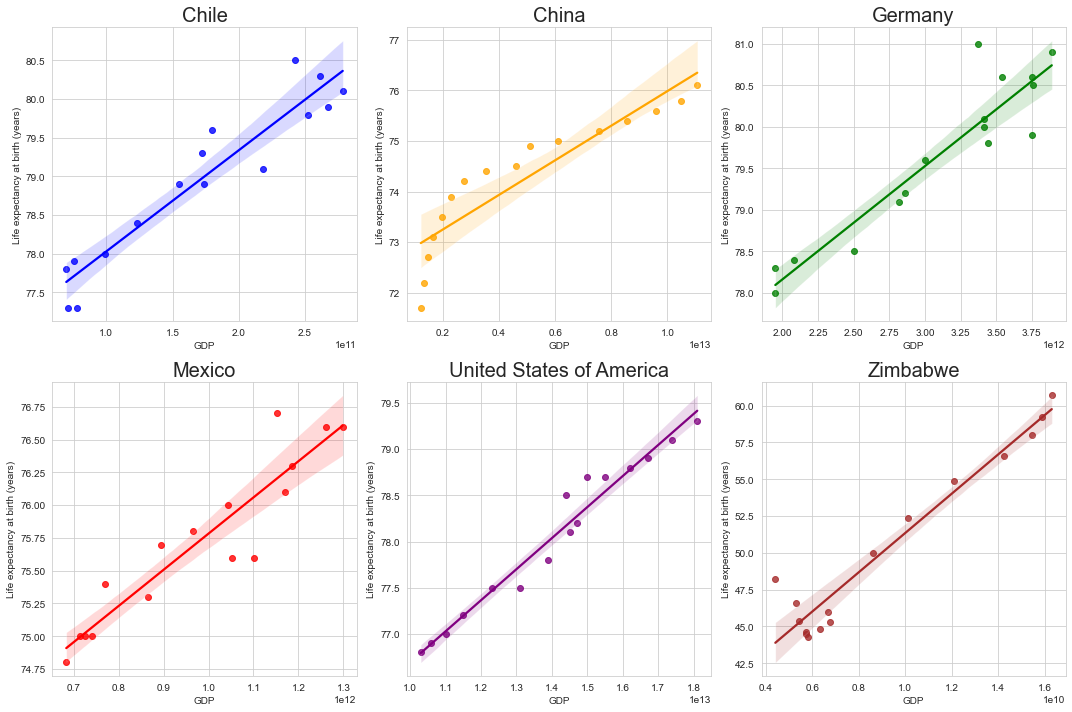

In [130]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))  # Creating a 2x3 grid of subplots and increasing the overall size
ax1 = sns.regplot(data = df[df['Country'] == 'Chile'], 
                  x = 'GDP', y = 'Life expectancy at birth (years)',
                  ax = axes[0,0], color = 'blue')  # Adding plot for Chile
ax2 = sns.regplot(data = df[df['Country'] == 'China'], 
                  x = 'GDP', y = 'Life expectancy at birth (years)', 
                  ax = axes[0,1], color = 'orange')  # Adding plot for China
ax3 = sns.regplot(data = df[df['Country'] == 'Germany'], 
                  x = 'GDP', y = 'Life expectancy at birth (years)', 
                  ax = axes[0,2], color = 'green')  # Adding plot for Germany
ax4 = sns.regplot(data = df[df['Country'] == 'Mexico'], 
                  x = 'GDP', y = 'Life expectancy at birth (years)', 
                  ax = axes[1,0], color = 'red')  # Adding plot for Mexico
ax5 = sns.regplot(data = df[df['Country'] == 'United States of America'], 
                  x = 'GDP', y = 'Life expectancy at birth (years)', 
                  ax = axes[1,1], color = 'purple')  # Adding plot for US
ax6 = sns.regplot(data = df[df['Country'] == 'Zimbabwe'], 
                  x = 'GDP', y = 'Life expectancy at birth (years)', 
                  ax = axes[1,2], color = 'brown')  # Adding plot for Zimbabwe
# Adding plot titles
ax1.set_title('Chile', size = 20)
ax2.set_title('China', size = 20)
ax3.set_title('Germany', size = 20)
ax4.set_title('Mexico', size = 20)
ax5.set_title('United States of America', size = 20)
ax6.set_title('Zimbabwe', size = 20)
plt.tight_layout()  # Picking a layout to prevent overlapping of plot labels
plt.show()

While not strictly a question to be answered by data visualization, our plots may have us wondering *how* each country's life expectancy increases relative to their GDP, and perhaps how it increases relative to year.  We can quantify the answers to these questions with a quick statistical calculation:

In [131]:
m_gdp, b_gdp = np.polyfit(df['GDP'], df['Life expectancy at birth (years)'], 1)
m_y, b_y = np.polyfit(df['Year'], df['Life expectancy at birth (years)'], 1)

print('Change in life expectancy per GDP dollar increase compared to the average:')
for country in df['Country'].unique():
    m1, b1 = np.polyfit(df[df['Country'] == country]['GDP'], 
                        df[df['Country'] == country]['Life expectancy at birth (years)'], 1)
    print("\t{}: {}% of the average".format(country, str(int(m1 / m_gdp * 100))))
    
print('\nChange in life expectancy per year compared to the average:')
for country in df['Country'].unique():
    m1, b1 = np.polyfit(df[df['Country'] == country]['Year'], 
                        df[df['Country'] == country]['Life expectancy at birth (years)'], 1)
    print("\t{}: {}% of the average".format(country, str(int(m1 / m_y * 100))))

Change in life expectancy per GDP dollar increase compared to the average:
	Chile: 1856% of the average
	China: 48% of the average
	Germany: 193% of the average
	Mexico: 391% of the average
	United States of America: 47% of the average
	Zimbabwe: 189470% of the average

Change in life expectancy per year compared to the average:
	Chile: 61% of the average
	China: 76% of the average
	Germany: 56% of the average
	Mexico: 34% of the average
	United States of America: 48% of the average
	Zimbabwe: 322% of the average


## Conclusion

Through data visualization, we were able to draw a few noteable conclusions:

1. Life expectancy in all countries included in our dataset is improving.
2. Zimbabwe has a significantly lower life expectancy than any of our other observed countries, but that gap appears to be closing.
3. The US has had the highest GDP through our entire observed period, but never the highest life expectancy.
4. The GDP for both the US and China has increased dramatically while remaining mostly stagnant for the other countries observed.
5. GDP is strongly positively correlated to life expectancy for every country observed.

Additionally, we used statistical analysis to compare the regression slopes of each country to that of all countries.  This revealed additional insights:

6. For every dollar increase to their GDP, Zimbabwe's life expectancy appears to increase 189,470% compared to the average.
7. Zimbabwe's life expectancy is increasing at a rate 222% faster than the average.
8. While the US and China have the largest and fastest-increasing GDPs, their increases in life expectancy per dollar of GDP increase are among the lower of those observed (48% and 76% of the average, respectively).